# 1. Extraire les probabilités de défaut implicites


In [16]:
import numpy as np
import pandas as pd
from scipy.stats import beta
import matplotlib.pyplot as plt

In [3]:
def pd_from_cds(spread_bp, maturity, recovery=0.40):
    """ 
    Fonction pour extraire les probabilité de défaut implicite
    """
    # Conversion bp -> décimal (1bp = 0.0001)
    spread = spread_bp / 10000  
    lambda_ = spread / (1 - recovery)
    pd = 1 - np.exp(-lambda_ * maturity)
    return pd

In [4]:
# Pour BNP
pd_bnp_4y = pd_from_cds(100, 4)
pd_bnp_5y = pd_from_cds(120, 5)

# Pour SG
pd_sg_4y = pd_from_cds(120, 4)
pd_sg_5y = pd_from_cds(150, 5)

print("PD BNP 4 ans :", pd_bnp_4y)
print("PD BNP 5 ans :", pd_bnp_5y)
print("PD SG 4 ans :", pd_sg_4y)
print("PD SG 5 ans :", pd_sg_5y)


PD BNP 4 ans : 0.06449301496838222
PD BNP 5 ans : 0.09516258196404048
PD SG 4 ans : 0.07688365361336424
PD SG 5 ans : 0.11750309741540454


# 2. Caractériser les distributions des taux de recouvrement de chacune des deux créances

In [13]:
# Pour carctériser les distributions des taux de recouvrement, on suppose que les recouvrement 
# suivent une loi Beta
# On déduit les paramètres à partir de la moyenne et de la volatilité

def beta_params(mean, vol):
    """  
    Fonction qui retourne les paramètres de la loi Beta à partir de la moyenne et de la volatilité
    """
    a_chapeau = (mean**2 * (1 - mean))/(vol**2) - mean
    b_chapeau = (mean**2 * (1 - mean)**2)/(mean * vol**2) - (1- mean)

    return a_chapeau, b_chapeau


In [14]:
# Pour BNP (moyenne 60 %, vol 15 %)
mean_bnp = 0.60
vol_bnp = 0.15
a_chapeau_bnp, b_chapeau_bnp = beta_params(mean_bnp, vol_bnp)

# Pour SG (moyenne 30 %, vol 25 %)
mean_sg = 0.30
vol_sg = 0.25
a_chapeau_sg, b_chapeau_sg= beta_params(mean_sg, vol_sg)

print("BNP Beta parameters: alpha =", a_chapeau_bnp, "beta =", b_chapeau_bnp)
print("SG Beta parameters: alpha =", a_chapeau_sg, "beta =", b_chapeau_sg)

BNP Beta parameters: alpha = 5.8 beta = 3.8666666666666676
SG Beta parameters: alpha = 0.708 beta = 1.652


## Interpétation :
  - ## Pour BNP : a > b donc asymétrie à droite
  - ## Pur SG : a < b  donc asymétrie à gauche ?

# 3. On s’intéresse à l’historique des données actions. 
## 3.a. Effectuer une analyse exploratoire univariée des données actions de ces deux entreprises

In [19]:
# Chargement des données
data = pd.read_csv("data.txt", sep="\s+", header=0)
data.head()

,BNP,SG
0,42.36,55.24
1,42.72,55.59
2,43.20,56.45
3,42.67,55.55
4,41.81,54.50


In [26]:
data.describe()

,BNP,SG
count,1000.000000,1000.000000
mean,31.906254,43.532641
std,9.630129,10.007847
min,14.056200,21.667700
25%,23.450325,36.065350
50%,34.353700,46.824800
75%,40.229375,51.291675
max,48.330000,60.680000


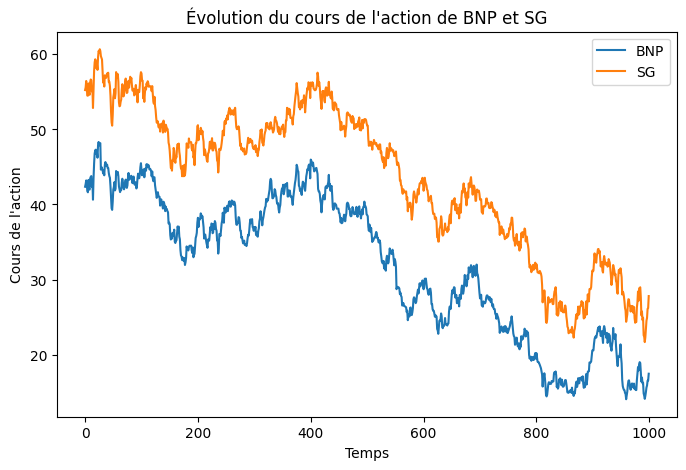

In [25]:
plt.figure(figsize=(8,5))
plt.plot(data["BNP"], label = "BNP")
plt.plot(data["SG"], label = "SG")
plt.legend()
plt.title("Évolution du cours de l'action de BNP et SG")
plt.xlabel("Temps")
plt.ylabel("Cours de l'action")
plt.show()

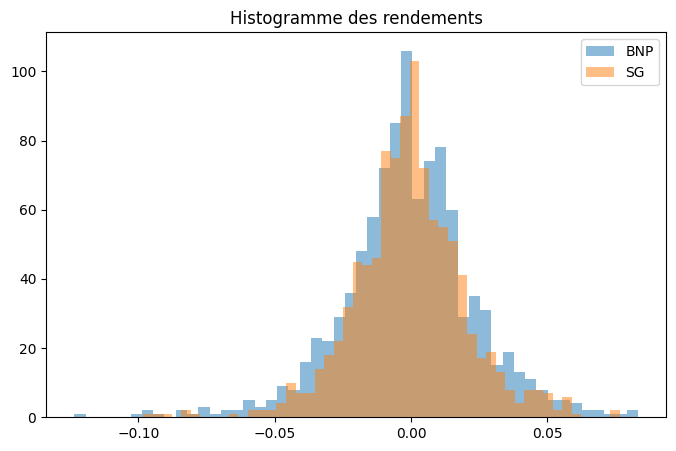

In [33]:
# Calcul des rendements et histogramme
data_returns = np.log(data/data.shift(1)).dropna()

plt.figure(figsize=(8,5))
plt.hist(data_returns['BNP'], bins=50, alpha=0.5, label="BNP")
plt.hist(data_returns['SG'], bins=50, alpha=0.5, label="SG")
plt.legend()
plt.title("Histogramme des rendements")
plt.show()

## 3.b Modéliser judicieusement les distributions univariées des facteurs de risques